# <center> Stack Overflow Survey Analysis Part 2 
    
After finishing the data science blog wrote down, in this notebook I will keep finding some extra useful insights using the stack overflow data like before, and just to practice and add more visualizations  
    
please make sure you read part 1 first also My medium blog post regarding the Part 1 you can find it in the following link: https://saad-k-alrazoq.medium.com/stack-overflow-analysis-and-insights-f389d890110b

In [1]:
# importing the liberaries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter

In [2]:
#reading the dataset
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('We Have {} Responders in this survey'.format(df.shape[0]), 'And we have {} questions'.format(df.shape[1]))

We Have 51392 Responders in this survey And we have 154 questions


In [10]:
for col_name in df:
    print(col_name)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

In [123]:
EU = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland']
NA = ['Canada','United States']

ASIA = ['China','Iran','Turkey','Lebanon','Jordan','Iraq','Singapore','South Korea','Thailand','India',
        'Vietnam','Taiwan','Russia','Japan','Malaysia','Georgia','Saudi Arabia','Oman','Qatar','Kuwait','Bahrain','United Arab Emirates', 'Afghanistan'
      'Australia', ]
AFRICA = ['Sudan','Kenya','Morocco','Egypt','Sengal','South Africa','Algiria','Libya','Chad','Cameroon','Ghana','Tunisia']

In [124]:
#creating a location column so we can see the Continentes we have  
df['Location'] = df['Country'].apply(lambda x: 'EU' if x in EU
                                      else ('NA' if x in NA
                                      else 'ASIA' if x in ASIA
                                      else 'AFRICA' if x in AFRICA
                                      else 'Other'))

## Checking what does the responders recommend for Studying/learning

In [11]:
Edu = df['EducationTypes'].value_counts().reset_index()
Edu.rename(columns={'index':'Education Type', 'EducationTypes':'Count'})

,Education Type,Count
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276
...,...,...
442,Bootcamp; Part-time/evening course; Industry c...,1
443,Online course; Bootcamp; Part-time/evening cou...,1
444,Bootcamp; Part-time/evening course; On-the-job...,1
445,Bootcamp; Part-time/evening course; Industry c...,1


In [12]:
#First of all let's clean the data and splitting them
#Here we are no dealing with any null value as it will automatically not be considered

def clean_series(df,col_name):
    """
    inputs: 
    df: dataframe which you want to manipulate
    col_name: name of the column which you want to clean the data
    
    outputs:
    df2: Panda's dataframe with the unique element seperated and
         their count
    """
    temp = df[col_name]
    temp = temp.dropna().reset_index()
    temp = temp[col_name].str.split(';')
    emp_list=[]
    for i in range(len(temp)):
        emp_list += temp[i]

    for i in range(len(emp_list)):
        emp_list[i] = emp_list[i].strip()

    emp_set = list(set(emp_list))    
    emp_set

    c = Counter(emp_list)
    print(c.items())
    df2 = pd.DataFrame({'Methods':list(c.keys()),'Counts':list(c.values())})
    
    return df2

In [148]:
rec= clean_series(df,'EducationTypes').sort_values(by='Counts')

dict_items([('Online course', 13792), ('Open source contributions', 11225), ('Self-taught', 27330), ('Hackathon', 7150), ('Coding competition', 6683), ('Part-time/evening course', 4654), ('On-the-job training', 12508), ('Bootcamp', 2727), ('Industry certification', 4472)])


In [150]:
rec.tail()

,Methods,Counts
3,Hackathon,7150
1,Open source contributions,11225
6,On-the-job training,12508
0,Online course,13792
2,Self-taught,27330


Text(0.5, 1.0, 'Responders Recommendations')

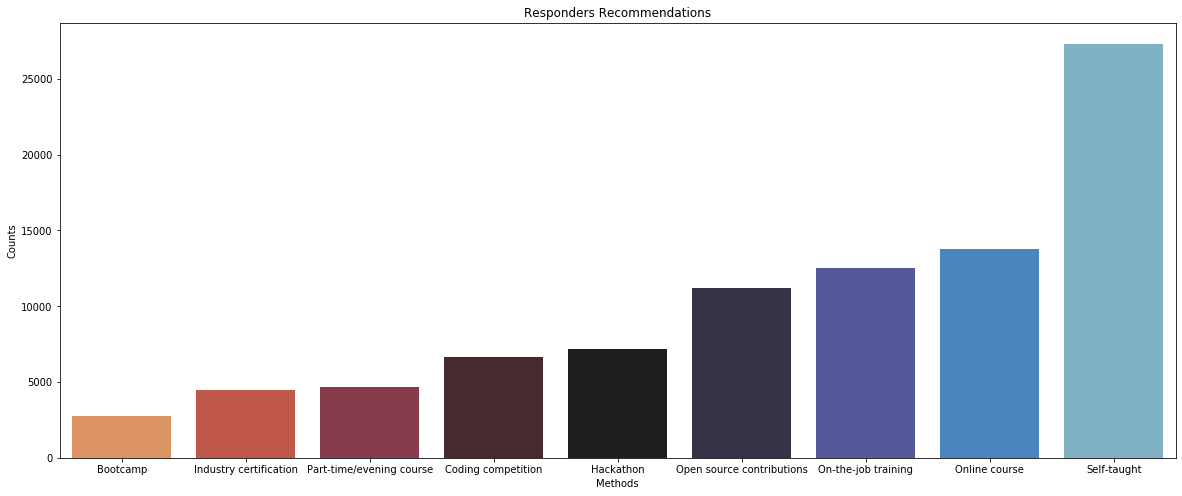

In [152]:
plt.figure(figsize=(20,8))
sns.barplot(data = rec, x='Methods',y='Counts', palette='icefire_r');
plt.title('Responders Recommendations')

as we can see in the preivous chart, that most of the responders taught themselves, and after that online courses 

but we want to know what kind of method do they use so they can teach themselves

In [153]:
method = clean_series(df,'SelfTaughtTypes').sort_values(by='Counts')

dict_items([('Official documentation', 21434), ('Stack Overflow Q&A', 21409), ('Other', 3129), ('Trade book', 14389), ('Textbook', 5558), ('Non-Stack online communities', 13546), ('Company internal community', 4947), ('Friends network', 5537), ('Built-in help', 12585), ('Stack Overflow Docs', 7348), ('Tutoring/mentoring', 1164)])


In [154]:
method.head()

,Methods,Counts
10,Tutoring/mentoring,1164
2,Other,3129
6,Company internal community,4947
7,Friends network,5537
4,Textbook,5558


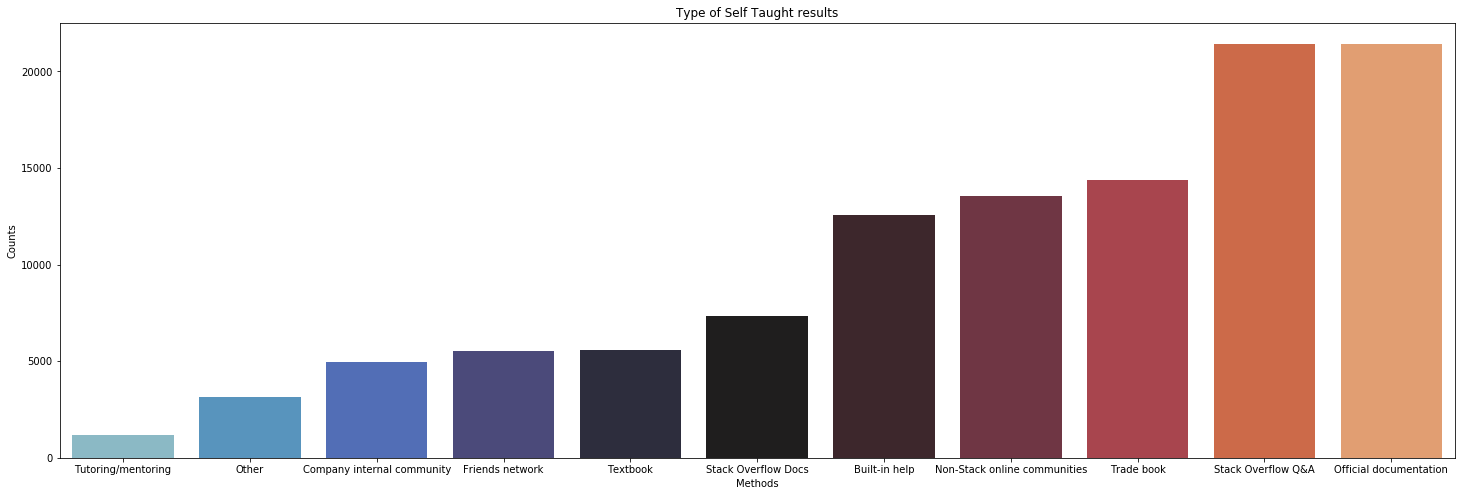

In [155]:
plt.figure(figsize=(25,8))
sns.barplot(data = method, x='Methods', y='Counts', palette='icefire')
plt.title('Type of Self Taught results')
plt.show()

So most of the self taught developers uses Official documents for programming lanuages, also in second comes stack overflow Q&A, and it's actually very helpful since a lot of people face a lot of erorrs and problems, they can find a lot of help from other programers 

### Checking the what language have they worked on and what do they want to work with

In [61]:
 df['HaveWorkedLanguage'].value_counts().reset_index()

,index,HaveWorkedLanguage
0,C#; JavaScript; SQL,1276
1,JavaScript; PHP; SQL,1143
2,Java,913
3,JavaScript,807
4,JavaScript; PHP,662
...,...,...
8433,JavaScript; Matlab; Objective-C; PHP; R; SQL; ...,1
8434,Perl; R,1
8435,Elixir; Go; JavaScript; R; SQL,1
8436,C; C++; C#; Java; Lua; Python; R; SQL,1


In [64]:
worked = clean_series(df,'HaveWorkedLanguage').sort_values(by='Counts')

dict_items([('Swift', 2368), ('JavaScript', 22875), ('Python', 11704), ('Ruby', 3324), ('SQL', 18754), ('Java', 14524), ('PHP', 10290), ('Matlab', 1569), ('R', 1634), ('Rust', 416), ('CoffeeScript', 1192), ('Clojure', 391), ('Elixir', 380), ('Erlang', 281), ('Haskell', 649), ('C#', 12476), ('Objective-C', 2349), ('C', 6974), ('C++', 8155), ('Assembly', 1823), ('VB.NET', 2273), ('Perl', 1585), ('Scala', 1309), ('F#', 457), ('TypeScript', 3488), ('Lua', 1039), ('VBA', 1574), ('Groovy', 1193), ('Go', 1557), ('Smalltalk', 327), ('Visual Basic 6', 1071), ('Common Lisp', 273), ('Dart', 145), ('Julia', 138), ('Hack', 107)])


In [87]:
worked.tail(20)

,Methods,Counts
22,Scala,1309
28,Go,1557
7,Matlab,1569
26,VBA,1574
21,Perl,1585
8,R,1634
19,Assembly,1823
20,VB.NET,2273
16,Objective-C,2349
0,Swift,2368


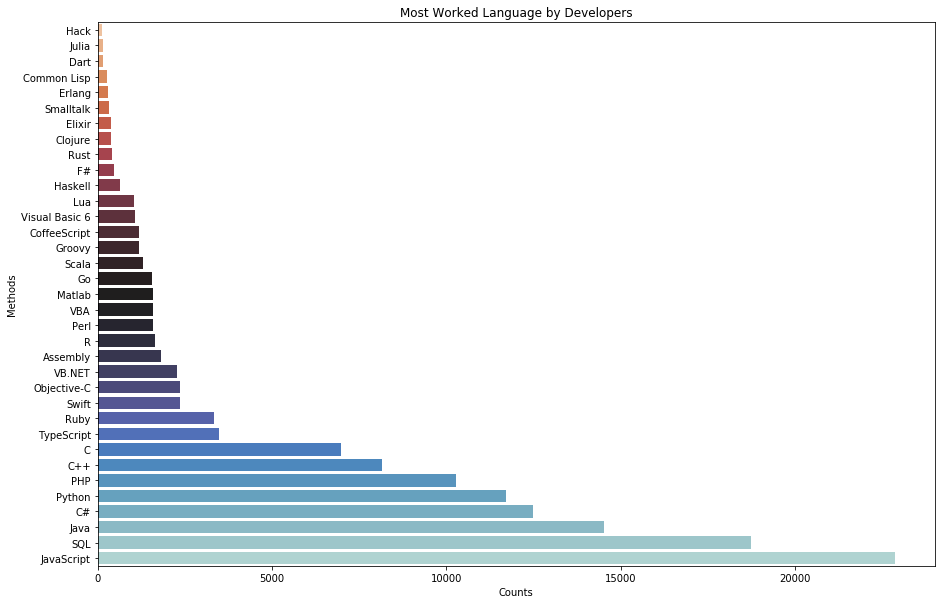

In [76]:
plt.figure(figsize=(15,10))
sns.barplot(data= worked, x='Counts', y='Methods', palette='icefire_r')
plt.title('Most Worked Language by Developers');

Clearly from the picture, we see that most of the Lanuages that they worked with was: 

- 1.Java Script with 22,875 
- 2.SQL with 18,754
- 3.Java with 14,524 
- 4.#C with 12,476 
- 5.Python with 11,704 

I was interested in how python and R doing, since it's the most important languages in Data Science field
we saw python was in 5th, and R was on 15th place 1,634 

In [140]:
asia_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Location
26,27,Professional developer,No,India,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,"5,000 to 9,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIA
48,49,Professional developer,"Yes, I program as a hobby",Malaysia,No,Employed full-time,Some college/university study without earning ...,Computer science or software engineering,About half the time,10 to 19 employees,...,Male,"Some college/university study, no bachelor's d...",Middle Eastern,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,NaN,NaN,ASIA
58,59,Professional developer,No,Turkey,"Yes, part-time",Employed full-time,Bachelor's degree,Computer programming or Web development,"Less than half the time, but at least one day ...","1,000 to 4,999 employees",...,Male,High school,I don’t know,Somewhat agree,Agree,Disagree,Strongly agree,NaN,NaN,ASIA
61,62,Professional developer,"Yes, I program as a hobby",India,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"5,000 to 9,999 employees",...,Male,A bachelor's degree,South Asian,Agree,Strongly agree,Disagree,Strongly agree,6636.323594,NaN,ASIA
66,67,Professional developer,No,India,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"More than half, but not all, the time","5,000 to 9,999 employees",...,Male,A bachelor's degree,South Asian,Strongly agree,Agree,Disagree,Agree,NaN,NaN,ASIA


### What Kind of Education Degree get the highest salary, and is there a difference between them and the locations

In [125]:
salary = df[df['Salary'].notnull()]
salary.drop('CareerSatisfaction', axis=1, inplace=True)

In [127]:
df2 = ['Country', 'YearsCodedJob', 'FormalEducation','Salary', 'Location']
                                                                    
salary = salary[df2]

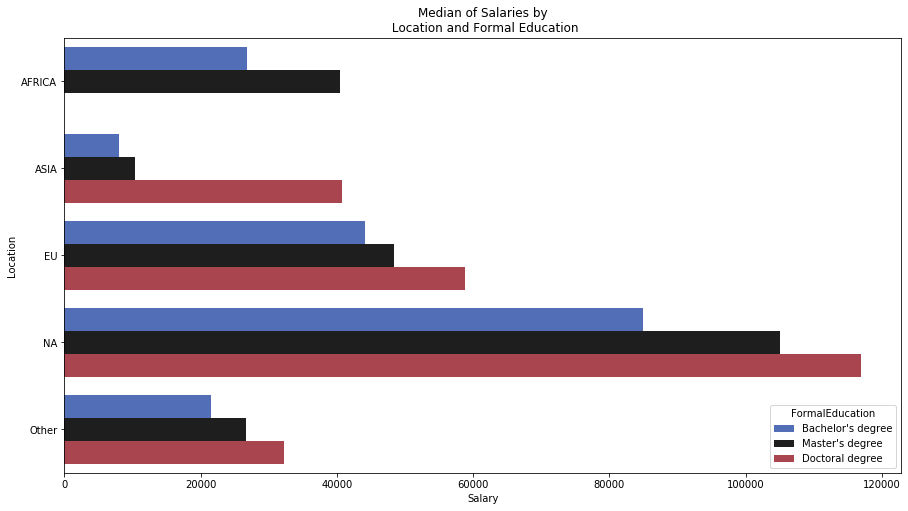

In [136]:
df3 = salary.copy()

df3 = df3[df3['FormalEducation'].isin(["Bachelor's degree","Master's degree",
                                                                              'Doctoral degree'])]
          

df3_plot = df3.groupby(['Location','FormalEducation'])['Salary'].median().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = 'Salary', y = 'Location', hue = 'FormalEducation', data = df3_plot, palette='icefire')
plt.title('Median of Salaries by\n Location and Formal Education');

we can notice the following from the preivous:

- Doctoral degree in each Location makes highest salary
- Also from our part 1 analysis we knew that NA had the highest salaries in general
- Bachelor's degree in NA makes more than any degree in any othe location/country
- A noticable difference between doctoral degree and othe degrees in ASIA 

## Conclusion

althought this is a part 2 of my analysis we reached to the current conclusion, I answered some questions that I had in mind and I might add a part 3 where I create a prediction model for salaries. 
So I can conclude the following from this notebook:

- Self-Taught is the most recommended way to learn or study, and after that comes online courses such as udacity, coursera, udemy etc...

- We found that the best methods to use in self-taught was Official Doucmentation, and closely after that was stack overflow Q&A   

- We also found that Javascript and SQL was the most used languages 

- Doctoral degree always had higher salaries than other degrees, and it does make sense 

- Bachelor's degree in NA makes more than any degree in any othe location/country
